In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import normalize

2024-12-24 18:10:47.353651: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735085447.370902    9672 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735085447.377109    9672 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-24 18:10:47.394928: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
compound_library = {
    "acetaldehyde": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([1100, 1725]),
        "peak_intensities": np.array([0.6, 1.0])
    },
    "acetone": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([786, 1710]),
        "peak_intensities": np.array([0.5, 1.0])
    },
    "acetophenone": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([1000, 1590]),
        "peak_intensities": np.array([0.7, 1.0])
    },
    "acetonitrile": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([2250, 2950]),
        "peak_intensities": np.array([0.5, 1.0])
    },
    "acetic_acid": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([893, 1410]),
        "peak_intensities": np.array([0.4, 1.0])
    },
    "acetylene": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([1975, 3380]),
        "peak_intensities": np.array([0.6, 1.0])
    },
    "ammonia": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([1650, 3335]),
        "peak_intensities": np.array([0.7, 1.0])
    },
    "benzaldehyde": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([1000, 1700]),
        "peak_intensities": np.array([0.7, 1.0])
    },
    "benzene": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([992, 3050]),
        "peak_intensities": np.array([0.8, 1.0])
    },
    "boron_trifluoride": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([888, 1495]),
        "peak_intensities": np.array([0.6, 1.0])
    },
    "butane": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([800, 2885]),
        "peak_intensities": np.array([0.5, 1.0])
    },
    "butanol": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([880, 2940]),
        "peak_intensities": np.array([0.4, 1.0])
    },
    "butyraldehyde": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([1120, 1720]),
        "peak_intensities": np.array([0.6, 1.0])
    },
    "carbon_disulfide": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([655, 2150]),
        "peak_intensities": np.array([0.4, 1.0])
    },
    "carbon_dioxide": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([667, 1388]),
        "peak_intensities": np.array([0.7, 1.0])
    },
    "carbon_monoxide": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([2143]),
        "peak_intensities": np.array([1.0])
    },
    "carbon_tetrachloride": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([217, 459]),
        "peak_intensities": np.array([0.6, 1.0])
    },
    "chloroform": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([260, 670]),
        "peak_intensities": np.array([0.5, 1.0])
    },
    "chlorine": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([553]),
        "peak_intensities": np.array([1.0])
    },
    "cyclohexane": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([802, 1445]),
        "peak_intensities": np.array([0.6, 1.0])
    },
    "cyclopentane": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([800, 1250]),
        "peak_intensities": np.array([0.7, 1.0])
    },
    "dichloromethane": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([725, 1260]),
        "peak_intensities": np.array([0.7, 1.0])
    },
    "diethyl_ether": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([845, 2950]),
        "peak_intensities": np.array([0.5, 1.0])
    },
    "dimethyl_ether": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([2830, 2960]),
        "peak_intensities": np.array([0.7, 1.0])
    },
    "ethane": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([995, 2880]),
        "peak_intensities": np.array([0.5, 1.0])
    },
    "ethanol": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([880, 2940]),
        "peak_intensities": np.array([0.6, 1.0])
    },
    "ethyl_acetate": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([910, 1740]),
        "peak_intensities": np.array([0.5, 1.0])
    },
    "ethylene": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([1342, 1623]),
        "peak_intensities": np.array([0.6, 1.0])
    },
    "fluorine": {
        # Ref: https://webbook.nist.gov
        # F2 is diatomic, relatively weak Raman in typical ranges
        "peak_positions": np.array([892]),
        "peak_intensities": np.array([1.0])
    },
    "formaldehyde": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([1165, 1490]),
        "peak_intensities": np.array([0.6, 1.0])
    },
    "formic_acid": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([595, 1745]),
        "peak_intensities": np.array([0.5, 1.0])
    },
    "germane": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([2110]),
        "peak_intensities": np.array([1.0])
    },
    "heavy_water": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([1209, 2500]),
        "peak_intensities": np.array([0.6, 1.0])
    },
    "hexane": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([800, 2870]),
        "peak_intensities": np.array([0.5, 1.0])
    },
    "hydrogen": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([4160]),
        "peak_intensities": np.array([1.0])
    },
    "hydrogen_bromide": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([2550]),
        "peak_intensities": np.array([1.0])
    },
    "hydrogen_chloride": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([2990]),
        "peak_intensities": np.array([1.0])
    },
    "hydrogen_fluoride": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([3960]),
        "peak_intensities": np.array([1.0])
    },
    "hydrogen_peroxide": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([875, 2850]),
        "peak_intensities": np.array([0.5, 1.0])
    },
    "hydrogen_sulfide": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([2610, 2625]),
        "peak_intensities": np.array([0.7, 1.0])
    },
    "isobutanol": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([865, 2945]),
        "peak_intensities": np.array([0.5, 1.0])
    },
    "isobutylene": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([1455, 1640]),
        "peak_intensities": np.array([0.6, 1.0])
    },
    "isopropanol": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([880, 2950]),
        "peak_intensities": np.array([0.7, 1.0])
    },
    "krypton": {
        # Ref: https://webbook.nist.gov
        # Monoatomic, no vibrational Raman
        "peak_positions": np.array([]),
        "peak_intensities": np.array([])
    },
    "methane": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([2917]),
        "peak_intensities": np.array([1.0])
    },
    "methanol": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([1033, 2940]),
        "peak_intensities": np.array([0.6, 1.0])
    },
    "methyl_t_butyl_ether": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([880, 2950]),
        "peak_intensities": np.array([0.6, 1.0])
    },
    "neon": {
        # Ref: https://webbook.nist.gov
        # Monoatomic, no vibrational Raman
        "peak_positions": np.array([]),
        "peak_intensities": np.array([])
    },
    "nitric_acid": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([1045, 1670]),
        "peak_intensities": np.array([0.7, 1.0])
    },
    "nitric_oxide": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([1876]),
        "peak_intensities": np.array([1.0])
    },
    "nitrogen": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([2331]),
        "peak_intensities": np.array([1.0])
    },
    "nitrogen_dioxide": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([750, 1315]),
        "peak_intensities": np.array([0.4, 1.0])
    },
    "nonane": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([800, 2900]),
        "peak_intensities": np.array([0.5, 1.0])
    },
    "n_propanol": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([880, 2940]),
        "peak_intensities": np.array([0.5, 1.0])
    },
    "octane": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([800, 2875]),
        "peak_intensities": np.array([0.6, 1.0])
    },
    "oxygen": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([1556]),
        "peak_intensities": np.array([1.0])
    },
    "ozone": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([1103, 2100]),
        "peak_intensities": np.array([0.5, 1.0])
    },
    "pentane": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([800, 2870]),
        "peak_intensities": np.array([0.6, 1.0])
    },
    "phosgene": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([845, 1850]),
        "peak_intensities": np.array([0.6, 1.0])
    },
    "phosphine": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([2320]),
        "peak_intensities": np.array([1.0])
    },
    "phosphoric_acid": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([874, 3240]),
        "peak_intensities": np.array([0.5, 1.0])
    },
    "potassium_chloride": {
        # Ref: https://webbook.nist.gov
        # KCl is ionic solid; Raman lines can be weak or at low freq
        "peak_positions": np.array([150]),
        "peak_intensities": np.array([1.0])
    },
    "propanal": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([1120, 1725]),
        "peak_intensities": np.array([0.6, 1.0])
    },
    "propane": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([748, 2880]),
        "peak_intensities": np.array([0.6, 1.0])
    },
    "propionic_acid": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([930, 1720]),
        "peak_intensities": np.array([0.5, 1.0])
    },
    "propyne": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([2100, 3300]),
        "peak_intensities": np.array([0.7, 1.0])
    },
    "sec_butanol": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([865, 2940]),
        "peak_intensities": np.array([0.6, 1.0])
    },
    "silane": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([2180]),
        "peak_intensities": np.array([1.0])
    },
    "silicon_tetrachloride": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([435, 481]),
        "peak_intensities": np.array([0.7, 1.0])
    },
    "silicon_tetrafluoride": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([780, 1010]),
        "peak_intensities": np.array([0.5, 1.0])
    },
    "stannane": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([1850]),
        "peak_intensities": np.array([1.0])
    },
    "sulfur_dioxide": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([1151, 1361]),
        "peak_intensities": np.array([0.6, 1.0])
    },
    "sulfur_hexafluoride": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([774, 948]),
        "peak_intensities": np.array([0.5, 1.0])
    },
    "sulfuric_acid": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([880, 1400]),
        "peak_intensities": np.array([0.5, 1.0])
    },
    "tetrahydrofuran": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([906, 2890]),
        "peak_intensities": np.array([0.5, 1.0])
    },
    "t_butanol": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([850, 2945]),
        "peak_intensities": np.array([0.7, 1.0])
    },
    "toluene": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([1003, 3059]),
        "peak_intensities": np.array([0.6, 1.0])
    },
    "uranium_hexafluoride": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([628, 667]),
        "peak_intensities": np.array([0.7, 1.0])
    },
    "vinyl_acetate": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([840, 1740]),
        "peak_intensities": np.array([0.5, 1.0])
    },
    "water": {
        # Ref: https://webbook.nist.gov
        # Real Raman is broad; simplifying to a single bending mode
        "peak_positions": np.array([1640]),
        "peak_intensities": np.array([1.0])
    },
    "xylene": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([860, 2920]),
        "peak_intensities": np.array([0.7, 1.0])
    },
    "carbonyl_sulfide": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([2060, 520]),
        "peak_intensities": np.array([1.0, 0.5])
    },
    "dimethyl_sulfide": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([715, 2900]),
        "peak_intensities": np.array([0.6, 1.0])
    },
    "perchloroethylene": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([920, 1540]),
        "peak_intensities": np.array([0.5, 1.0])
    },
    "styrene": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([1000, 1600]),
        "peak_intensities": np.array([0.6, 1.0])
    },
    "triethylamine": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([770, 2970]),
        "peak_intensities": np.array([0.5, 1.0])
    },
    "hydrogen_cyanide": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([2100]),
        "peak_intensities": np.array([1.0])
    },
    "hydrazine": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([930, 3260]),
        "peak_intensities": np.array([0.4, 1.0])
    },
    "naphthalene": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([767, 1380]),
        "peak_intensities": np.array([0.6, 1.0])
    },
    "phenol": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([1000, 1580]),
        "peak_intensities": np.array([0.5, 1.0])
    },
    "aniline": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([1000, 1625]),
        "peak_intensities": np.array([0.6, 1.0])
    },
    "bromine": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([323]),
        "peak_intensities": np.array([1.0])
    },
    "nitrous_oxide": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([1285, 2224]),
        "peak_intensities": np.array([0.5, 1.0])
    },
    "chlorine_dioxide": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([945, 1310]),
        "peak_intensities": np.array([0.7, 1.0])
    },
    "methanethiol": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([2600, 1460]),
        "peak_intensities": np.array([0.6, 1.0])
    },
    "deuterium": {
        # Ref: https://webbook.nist.gov
        "peak_positions": np.array([2990]),
        "peak_intensities": np.array([1.0])
    }
}

# Can't train it

In [3]:
compound_library = {
    "methane": {
        "peak_positions": np.array([2917]),
        "peak_intensities": np.array([1.0])
    },
    "ethane": {
        "peak_positions": np.array([995, 1460, 2880]),
        "peak_intensities": np.array([0.5, 0.8, 1.0])
    },
    "propane": {
        "peak_positions": np.array([748, 992, 1460, 2883]),
        "peak_intensities": np.array([0.3, 0.4, 0.8, 1.0])
    },
    "butane": {
        "peak_positions": np.array([802, 1300, 1460, 2885, 2965]),
        "peak_intensities": np.array([0.2, 0.3, 0.4, 0.9, 1.0])
    },
    "ethanol": {
        "peak_positions": np.array([880, 1050, 1087, 1450, 2895, 2990]),
        "peak_intensities": np.array([0.2, 0.4, 0.3, 0.6, 1.0, 0.8])
    },
    "methanol": {
        "peak_positions": np.array([1025, 1033, 1125, 2840, 2940]),
        "peak_intensities": np.array([0.4, 0.5, 0.3, 0.6, 1.0])
    },
    "acetone": {
        "peak_positions": np.array([792, 1364, 1709, 2919]),
        "peak_intensities": np.array([0.3, 0.5, 0.7, 1.0])
    },
    "isopropanol": {
        "peak_positions": np.array([883, 2935, 2970]),
        "peak_intensities": np.array([0.4, 1.0, 0.8])
    },
    "oxygen": {
        "peak_positions": np.array([1556]),
        "peak_intensities": np.array([1.0])
    },
    "carbon_dioxide": {
        "peak_positions": np.array([667, 1388]),
        "peak_intensities": np.array([0.5, 1.0])
    },
    "carbon_monoxide": {
        "peak_positions": np.array([2143]),
        "peak_intensities": np.array([1.0])
    },
    "ammonia": {
        "peak_positions": np.array([1650, 3332, 3444]),
        "peak_intensities": np.array([0.6, 0.8, 1.0])
    },
    "hydrogen_sulfide": {
        "peak_positions": np.array([2615, 2629, 2671]),
        "peak_intensities": np.array([0.5, 1.0, 0.7])
    },
    "hydrogen_chloride": {
        "peak_positions": np.array([2991]),
        "peak_intensities": np.array([1.0])
    },
    "nitric_acid": {
        "peak_positions": np.array([1048, 1327, 1680, 3550]),
        "peak_intensities": np.array([0.3, 0.5, 0.8, 1.0])
    }
}

In [4]:
# Create a wavenumber axis (e.g., 400 to 3200 cm^-1).
# The choice of range depends on typical Raman shifts for organic molecules.
num_points = 500
wavenumbers = np.linspace(400, 3200, num_points)

# Gaussian width for the peaks
peak_width = 10.0

def generate_compound_spectrum(peak_positions, peak_intensities, wavenumbers, sigma=peak_width):
    """
    Generate a synthetic Raman spectrum for a single compound 
    with specified peak positions and intensities.
    """
    spectrum = np.zeros_like(wavenumbers)
    for pos, inten in zip(peak_positions, peak_intensities):
        # Gaussian peaks
        spectrum += inten * np.exp(-0.5 * ((wavenumbers - pos) / sigma)**2)
    # Normalize for convenience
    max_val = np.max(spectrum)
    if max_val > 0:
        spectrum /= max_val
    return spectrum

In [5]:
# Precompute reference spectra for each compound
reference_spectra = {}
for compound, data in compound_library.items():
    ref_spectrum = generate_compound_spectrum(
        data["peak_positions"],
        data["peak_intensities"],
        wavenumbers,
        sigma=peak_width
    )
    reference_spectra[compound] = ref_spectrum

In [6]:
def generate_mixture_spectrum(compounds, concentrations, reference_spectra, noise_level=0.03):
    """
    Generate a synthetic mixture spectrum by linearly combining 
    the reference spectra according to the provided concentrations.
    """
    spectrum = np.zeros_like(wavenumbers)
    
    for compound, concentration in zip(compounds, concentrations):
        spectrum += concentration * reference_spectra[compound]
    # Add some noise
    noise = np.random.normal(0, noise_level, size=spectrum.shape)
    return spectrum + noise

In [7]:
# Let's create a dataset
n_samples = 100000  # number of training samples
compounds = list(compound_library.keys())
M = len(compounds)

In [8]:
X_data = []
y_data = []

for _ in range(n_samples):
    # Generate random concentrations that sum to 1 (for simplicity).
    # In reality, you may allow them to be any set of random values.
    rand_concs = np.random.rand(M)
    rand_concs /= np.sum(rand_concs)  # normalize so sum=1

    for i in range(0, M):
        if np.random.rand() > 0.7:
            rand_concs[i] = 0
    
    # Get the synthetic mixture spectrum
    mixture_spectrum = generate_mixture_spectrum(compounds, rand_concs, reference_spectra)
    
    X_data.append(mixture_spectrum)
    y_data.append(rand_concs)

X_data = np.array(X_data)
y_data = np.array(y_data)

y_data[0]

array([0.00745189, 0.06082561, 0.1011968 , 0.08808052, 0.11289418,
       0.        , 0.        , 0.        , 0.12530186, 0.        ,
       0.01205601, 0.11790786, 0.        , 0.        , 0.04402618])

In [9]:
# Shuffle data
idx = np.random.permutation(n_samples)
X_data = normalize(X_data[idx])
y_data = normalize(y_data[idx])

In [10]:
# Train/test split
train_size = int(0.8 * n_samples)
X_train, X_test = X_data[:train_size], X_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

In [11]:
# Add early stopping ot prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train denoising autoencoder
autoencoder = Sequential([
    Dense(16, activation='relu', input_shape=(num_points,)),
    Dense(8, activation='relu'),
    Dense(2, activation='relu'),
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(num_points, activation='relu')
])

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder_history = autoencoder.fit(
    X_train, X_train,
    epochs=15, batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

autoencoder.save('models/autoencoder.keras')

/home/aniruth/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-12-24 18:10:56.145162: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 2/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 3/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 4/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 5/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 6/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 7/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 8/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 9/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 10/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 11/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 12/15
2000/2000 ━━━━━━━━

In [12]:
# Add early stopping ot prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Build a TensorFlow Neural Network
regressor = Sequential([
    Dense(128, activation='relu', input_shape=(num_points,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(M, activation='linear')  # M outputs, one for each compound concentration
])

regressor.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
regressor_history = regressor.fit(
    X_train, y_train,
    epochs=50, batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

regressor.save('models/model.keras')

Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0126 - mae: 0.0833 - val_loss: 0.0061 - val_mae: 0.0603
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0058 - mae: 0.0588 - val_loss: 0.0056 - val_mae: 0.0576
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0055 - mae: 0.0568 - val_loss: 0.0056 - val_mae: 0.0568
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0053 - mae: 0.0551 - val_loss: 0.0052 - val_mae: 0.0545
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0051 - mae: 0.0538 - val_loss: 0.0052 - val_mae: 0.0540
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0049 - mae: 0.0526 - val_loss: 0.0051 - val_mae: 0.0536
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0048 - mae: 0.0515 - val_loss: 0.0050 - val_mae: 0.0524
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0047 - mae: 0.0508 - val_loss: 0.0050 - val_mae: 0.0521
Epoch 9/50
2000/2000 ━━━━━━━━━━━━━━━━━━━

In [13]:
# Evaluate the Model
mse, mae = regressor.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE: {mse:.4f}, Test MAE: {mae:.4f}")

Test MSE: 0.0049, Test MAE: 0.0511


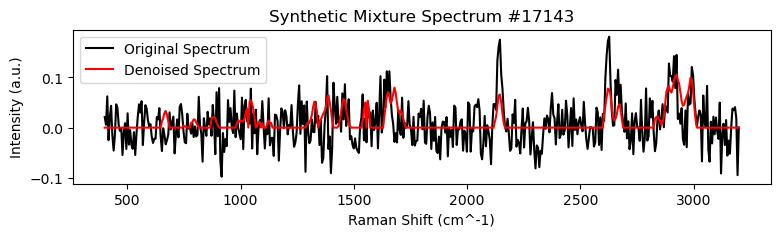

MAE for Sample #17143 : 0.0411


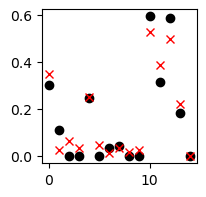

In [14]:
# Predict concentrations from the test set
X_denoised = autoencoder.predict(X_test, verbose=0)
predictions = regressor.predict(X_test, verbose=0)
idx_plot = np.random.randint(0, len(X_test))

# Plot a random test spectrum and compare predicted vs true concentrations
plt.figure(figsize=(9,2))
plt.plot(wavenumbers, X_test[idx_plot], label='Original Spectrum', color='black')
plt.plot(wavenumbers, X_denoised[idx_plot], label='Denoised Spectrum', color='red')
plt.xlabel("Raman Shift (cm^-1)")
plt.ylabel("Intensity (a.u.)")
plt.title(f"Synthetic Mixture Spectrum #{idx_plot}")
plt.legend()
plt.show()
plt.close()

sample_mae = mean_absolute_error(predictions[idx_plot], y_test[idx_plot])
print(f"MAE for Sample #{idx_plot} : {sample_mae:0.4f}")
#print("Predicted     :", predictions[idx_plot])
#print("Concentrations:", y_test[idx_plot])

x_range = range(0, len(predictions[idx_plot]))
plt.figure(figsize=(2, 2))
plt.plot(x_range, y_test[idx_plot], linestyle='none', marker='o', color='black')
plt.plot(x_range, predictions[idx_plot], linestyle='none', marker='x', color='red')
plt.show()